### <center>Fernandao Kwangtama Tekayadi</center>
#### <center>F1D022120</center>

# MODUL 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

Code di atas berguna untuk mengimport beberapa library yang berada di Python yaitu numpy, matplotlib pyplot, matplotlib image, dan cv2 yang berguna untuk dapat menggunakan fungsi yang di sediakan dari library tersebut.

Kode di bawah digunakan untuk membaca sebuah gambar dari Manchester United, kemudian mengonversinya menjadi citra dalam skala keabuan (grayscale) menggunakan OpenCV. Proses konversi ini mengubah citra menjadi hanya terdiri dari tingkat keabuan (gray level) tanpa warna, yang berguna untuk analisis dan pemrosesan lebih lanjut. Setelah konversi, citra dalam skala keabuan ditampilkan menggunakan matplotlib. Kemudian, nilai piksel dari citra keabuan dicetak sebagai representasi matriks nilai piksel dalam bentuk angka.

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


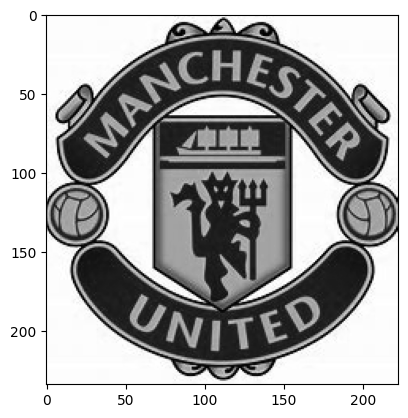

In [2]:
image = img.imread("../assets/manchester_united.jpeg")
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
print(gray_image)

In [3]:
kernel_3x3 = np.full((3,3), 1/9) 
kernel_9x9 = np.full((9,9), 1/81) 

kernel_sharp = np.array([[1/9, 1/9, 1/9],
                         [1/9, 8/9, 1/9],
                         [1/9, 1/9, 1/9]])

kernel_smooth = np.array([[1/10, 1/10, 1/10],
                          [1/10, 1/5, 1/10],
                          [1/10, 1/10, 1/10]])

Kode di atas mendefinisikan beberapa kernel yang umumnya digunakan dalam menghitung mean, modus, median, sharpening, dan smoothing

In [4]:
def mean(image, kernel):
    Tinggi, Lebar = image.shape
    Tinggi_1, Lebar_1 = kernel.shape
    Tengah = int((Tinggi_1 - 1)/2)
    Tengah_1 = int((Lebar_1 - 1)/2)
    atas = Tengah
    kanan = Lebar_1 - Tengah_1
    bawah = Tinggi_1 - Tengah
    kiri = Tengah_1
    image = np.pad(image, ((kiri, kanan), (atas, bawah)), mode='edge')

    hasil = np.zeros([Tinggi, Lebar])
    for i in range(Tinggi):
         for j in range(Lebar):
             temp = 0
             for k in range(Tinggi_1):
                 for l in range(Lebar_1):
                     temp += image[i+k, j+l] * kernel[k, l]
             hasil[i, j] = temp 
    return hasil

Kode di atas digunakan untuk melakukan konvolusi citra dengan kernel tertentu, sehingga fungsi ini bertujuan untuk menerapkan efek yang diinginkan (seperti blur atau penajaman) pada citra menggunakan kernel yang diberikan

In [5]:
def median(arr):
    temp = len(arr) 
    urutan = sorted(arr) 
    if temp % 2 != 0:
        median = urutan[temp // 2]
    else:
        x = urutan[temp // 2]
        y = urutan[temp // 2 - 1]
        median = (x + y) / 2
    return median 


Kode di atas digunakan untuk menghitung nilai median dari sebuah array bilangan. Median adalah nilai tengah dari kumpulan data yang telah diurutkan. Jika jumlah data ganjil, median adalah nilai di tengah urutan data. Namun, jika jumlah data genap, median dihitung dengan cara mengambil rata-rata dari dua nilai tengah

In [6]:
def median_gambar(image, kernel):
    Tinggi, Lebar = image.shape
    Tinggi_1, Lebar_1 = kernel.shape
    Tengah = int((Tinggi_1 - 1) / 2)
    Tengah_1 = int((Lebar_1 - 1) / 2)
    atas = Tengah
    kanan = Lebar_1 - Tengah_1
    bawah = Tinggi_1 - Tengah
    kiri = Tengah_1
    image = np.pad(image, ((kiri, kanan), (atas, bawah)), mode='edge')

    hasil = np.zeros([Tinggi, Lebar]) 
    for i in range(Tinggi):
         for j in range(Lebar):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(Tinggi_1):
                 for l in range(Lebar_1):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     hasil[i,j] = median(temp)
             
    return hasil 

Kode di atas adalah implementasi untuk menerapkan filter median pada citra menggunakan kernel yang ditentukan. Hasilnya adalah citra yang telah diproses dengan filter median, yang berguna untuk mengurangi noise dan meningkatkan kualitas citra

In [7]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1
            
    max_count = 0
    modus = None
    for num, value in count.items():
        if value > max_count:
            max_count = value
            modus = num
    return modus

Kode di atas digunakan untuk menghitung nilai modus dari sebuah array bilangan. Modus adalah nilai yang paling sering muncul dalam kumpulan data

In [8]:
def modus_gambar(image, kernel):
    Tinggi, Lebar = image.shape
    Tinggi_1, Lebar_1 = kernel.shape
    Tengah = int((Tinggi_1 - 1)/2)
    Tengah_1 = int((Lebar_1 - 1)/2)
    atas = Tengah
    kanan = Lebar_1 - Tengah_1
    bawah = Tinggi_1 - Tengah
    kiri = Tengah_1
    image = np.pad(image, ((kiri, kanan), (atas, bawah)), mode='edge')

    hasil = np.zeros([Tinggi, Lebar])
    for i in range(Tinggi):
         for j in range(Lebar):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(Tinggi_1):
                 for l in range(Lebar_1):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     hasil[i,j] = modus(temp)
             
    return hasil


Kode di atas adalah implementasi dari fungsi modus_gambar yang bertujuan untuk melakukan operasi modus pada suatu citra menggunakan kernel yang diberikan sehingga digunakan untuk menghasilkan citra baru di mana setiap piksel memiliki nilai modus dari tetangganya sesuai dengan kernel yang diberikan

In [9]:
def sharpened(image, kernel_sharp):
    tinggi, lebar = image.shape
    sharpened_image = np.zeros((tinggi, lebar))
    
    for i in range(1, tinggi - 1):
        for j in range(1, lebar - 1):
            sharpened_pixel = (kernel_sharp[0][0] * image[i - 1][j - 1] + 
                               kernel_sharp[0][1] * image[i - 1][j] + 
                               kernel_sharp[0][2] * image[i - 1][j + 1] + 
                               kernel_sharp[1][0] * image[i][j - 1] + 
                               kernel_sharp[1][1] * image[i][j] + 
                               kernel_sharp[1][2] * image[i][j + 1] + 
                               kernel_sharp[2][0] * image[i + 1][j - 1] + 
                               kernel_sharp[2][1] * image[i + 1][j] + 
                               kernel_sharp[2][2] * image[i + 1][j + 1])

            sharpened_image[i][j] = sharpened_pixel

    return sharpened_image

Kode di atas ini digunakan untuk melakukan operasi penguatan citra (sharpening) menggunakan sebuah kernel tertentu yang di mana Hasil akhirnya adalah citra yang telah diperkuat, di mana setiap piksel memiliki nilai yang lebih tajam atau lebih kontras

In [10]:
def smoothing(image, kernel_smooth):
    tinggi, lebar = gray_image.shape
    smoothed_image = np.zeros((tinggi, lebar))
    
    for i in range(1, tinggi - 1):
        for j in range(1, lebar - 1):
            smoothed_pixel = (kernel_smooth[0][0] * image[i - 1][j - 1] + 
                              kernel_smooth[0][1] * image[i - 1][j] + 
                              kernel_smooth[0][2] * image[i - 1][j + 1] + 
                              kernel_smooth[1][0] * image[i][j - 1] + 
                              kernel_smooth[1][1] * image[i][j] + 
                              kernel_smooth[1][2] * image[i][j + 1] + 
                              kernel_smooth[2][0] * image[i + 1][j - 1] + 
                              kernel_smooth[2][1] * image[i + 1][j] + 
                              kernel_smooth[2][2] * image[i + 1][j + 1])
            smoothed_image[i][j] = smoothed_pixel
    return (smoothed_image)

Kode di atas ini bertujuan untuk melakukan operasi penyamaran pada citra menggunakan sebuah kernel tertentu sehingga Hasil akhirnya adalah citra yang telah disamaratakan, di mana setiap piksel memiliki nilai yang lebih rata atau lebih halus

In [11]:
mean_3x3 = mean(gray_image, kernel_3x3)
mean_9x9 = mean(gray_image, kernel_9x9)

median_3x3 = median_gambar(gray_image, kernel_3x3)
median_9x9 = median_gambar(gray_image, kernel_9x9)

modus_3x3 = modus_gambar(gray_image, kernel_3x3)
modus_9x9= modus_gambar(gray_image, kernel_9x9)

sharpened_image = sharpened(gray_image, kernel_sharp)
smothgmbr = smoothing(gray_image, kernel_smooth)

Kode di atas melakukan beberapa operasi pemrosesan gambar pada gambar skala abu-abu gray_image menggunakan kernel-kernel yang berbeda. Operasi tersebut mencakup menghitung nilai rata-rata, median, dan modus dari gambar menggunakan kernel 3x3 dan 9x9, serta mengasah (sharpening) dan menghaluskan (smoothing) gambar

Kode di bawah memvisualisasikan hasil dari operasi pemrosesan gambar yang telah dilakukan sebelumnya. Gambar hasil dari operasi perataan (mean) dengan kernel 3x3 dan 9x9, operasi pengasahan (sharpening), dan operasi pelunakan (smoothing) ditampilkan pada baris pertama, sedangkan gambar hasil dari operasi modus dengan kernel 3x3 dan 9x9 serta operasi median dengan kernel 3x3 dan 9x9 ditampilkan pada baris kedua. 

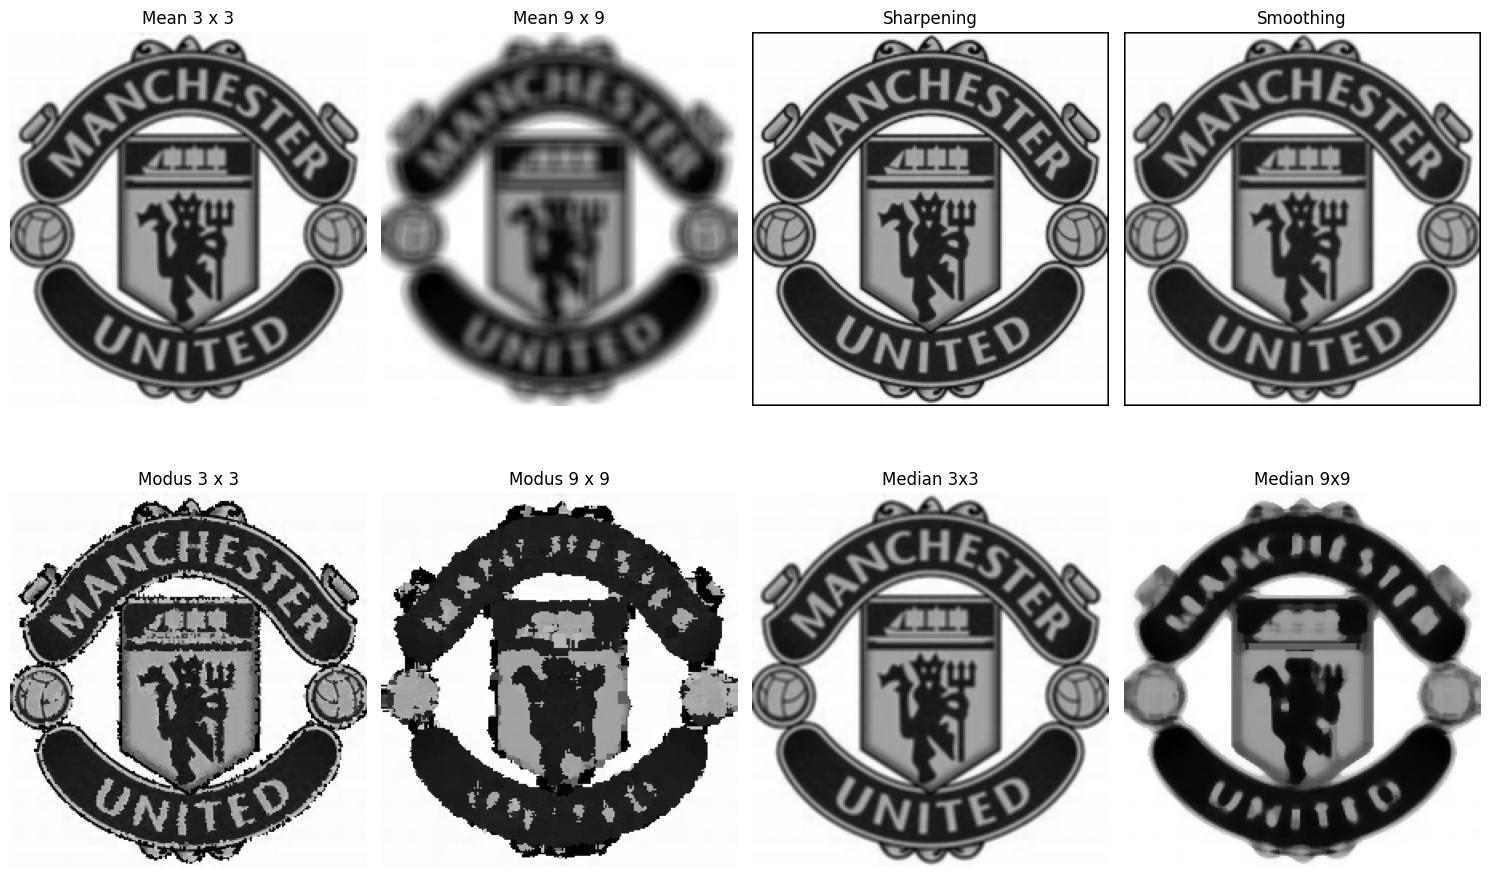

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0, 0].set_title('Mean 3 x 3')
ax[0, 0].imshow(mean_3x3, cmap='gray')
ax[0, 0].axis('off')

ax[0, 1].set_title('Mean 9 x 9')
ax[0, 1].imshow(mean_9x9, cmap='gray')
ax[0, 1].axis('off')

ax[0, 2].set_title('Sharpening')
ax[0, 2].imshow(sharpened_image, cmap='gray')
ax[0, 2].axis('off')

ax[0, 3].set_title('Smoothing')
ax[0, 3].imshow(smothgmbr, cmap='gray')
ax[0, 3].axis('off')

ax[1, 0].set_title('Modus 3 x 3')
ax[1, 0].imshow(modus_3x3, cmap='gray')
ax[1, 0].axis('off')

ax[1, 1].set_title('Modus 9 x 9')
ax[1, 1].imshow(modus_9x9, cmap='gray')
ax[1, 1].axis('off')

ax[1, 2].set_title('Median 3x3')
ax[1, 2].imshow(mean_3x3, cmap='gray')
ax[1, 2].axis('off')

ax[1, 3].set_title('Median 9x9')
ax[1, 3].imshow(median_9x9, cmap='gray')
ax[1, 3].axis('off')

plt.tight_layout()
plt.show()


In [13]:
prewitX = np.array([[1,0,-1],
                    [1,0,-1],
                    [1,0,-1]])

prewitY = np.array([[-1,-1,-1],
                    [0, 0 , 0],
                    [1, 1 , 1]])

Kode di atas merupakan dua buah kernel Prewitt untuk deteksi tepi horizontal (prewitX) dan deteksi tepi vertikal (prewitY). Kernel Prewitt ini adalah kernel konvolusi yang digunakan dalam pemrosesan citra untuk mendeteksi perubahan tajam dalam intensitas citra

In [14]:
sx = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])

sy = np.array([[1,2,1],
               [0,0,0],
               [-1,-2,-1]])

Kode di atas merupakan dua buah kernel yang didefinisikan di sini adalah kernel Sobel untuk deteksi tepi horizontal (sx) dan deteksi tepi vertikal (sy). Kernel Sobel juga digunakan dalam pemrosesan citra untuk mendeteksi perubahan tajam dalam intensitas citra, mirip dengan kernel Prewitt. Kernel sx menangkap perubahan intensitas horizontal di dalam citra, sementara sy menangkap perubahan intensitas vertikal

In [15]:
robertX = np.array([[1,0],
                    [0,-1]])

robertY = np.array([[0,1],
                    [-1,0]])

Kode di atas merupakan dua buah kernel yang didefinisikan di sini adalah kernel Robert untuk deteksi tepi horizontal (robertX) dan deteksi tepi vertikal (robertY). Kernel Robert juga digunakan dalam pemrosesan citra untuk mendeteksi perubahan tajam dalam intensitas citra, fokus pada perubahan tajam yang terjadi dalam sudut 45 derajat. Kernel robertX menangkap perubahan intensitas dalam arah diagonal dari kiri atas ke kanan bawah, sementara robertY menangkap perubahan intensitas dalam arah diagonal dari kanan atas ke kiri bawah

In [16]:
def deteksi_tepi(image, kernel_x, kernel_y):
    tinggi, lebar = image.shape
    Tinggi_1, Lebar_1 = kernel_x.shape
    
    tepi_x = np.pad(image, ((Tinggi_1 // 2, Tinggi_1 // 2), (Lebar_1 // 2, Lebar_1 // 2)))
    hasil_x = np.zeros_like(image)
    for i in range(tinggi):
        for j in range(lebar):
            hasil_x[i, j] = np.sum(tepi_x[i:i + Tinggi_1, j:j + Lebar_1] * kernel_x)
    
    tepi_y = np.pad(image, ((Tinggi_1 // 2, Tinggi_1 // 2), (Lebar_1 // 2, Lebar_1 // 2)))
    hasil_y = np.zeros_like(image)
    for i in range(tinggi):
        for j in range(lebar):
            hasil_y[i, j] = np.sum(tepi_y[i:i + Tinggi_1, j:j + Lebar_1] * kernel_y)

    tepi = np.sqrt(np.square(hasil_x) + np.square(hasil_y))
    
    return tepi

Kode di atas berguna untuk mendeteksi tepi pada gambar menggunakan metode konvolusi dengan kernel Sobel, Prewitt, atau Robert, atau kernel apapun yang diberikan sebagai argumen input. Pertama, gambar diperluas (dilakukan padding) sesuai dengan ukuran kernel untuk memastikan bahwa perhitungan tepi dapat dilakukan di seluruh gambar. Kemudian, dilakukan konvolusi antara gambar dan kernel horizontal (kernel_x) dan kernel vertikal (kernel_y) secara terpisah. Hasil konvolusi dari kedua arah tersebut kemudian digunakan untuk menghitung magnitude (kekuatan) tepi dengan menggunakan rumus pythagoras

In [17]:
Mean = deteksi_tepi(mean_3x3, prewitX, prewitY)
Mean1 = deteksi_tepi(mean_9x9, prewitX, prewitY)

Median = deteksi_tepi(median_3x3, prewitX, prewitY)
Median1 = deteksi_tepi(median_9x9, prewitX, prewitY)

Modus = deteksi_tepi(modus_3x3, prewitX, prewitY)
Modus1 = deteksi_tepi(modus_9x9, prewitX, prewitY)

Sharp = deteksi_tepi(sharpened_image, prewitX, prewitY)
Smooth = deteksi_tepi(smothgmbr, prewitX, prewitY)


Kode di atas mengaplikasikan deteksi tepi menggunakan kernel Prewitt pada hasil operasi pemrosesan gambar yang telah dilakukan sebelumnya. Operasi deteksi tepi dilakukan pada citra hasil dari operasi mean, median, modus, sharpening, dan smoothing. Kernel Prewitt yang telah didefinisikan sebelumnya (prewitX untuk deteksi tepi horizontal dan prewitY untuk deteksi tepi vertikal) digunakan untuk mendeteksi tepi dalam kedua arah tersebut

Kode di bawah menampilkan gambar hasil deteksi tepi menggunakan kernel Prewitt pada berbagai operasi pemrosesan gambar sebelumnya. Hasil deteksi tepi dengan kernel Prewitt diterapkan pada citra hasil operasi mean, median, modus, sharpening, dan smoothing dengan ukuran kernel 3x3 dan 9x9

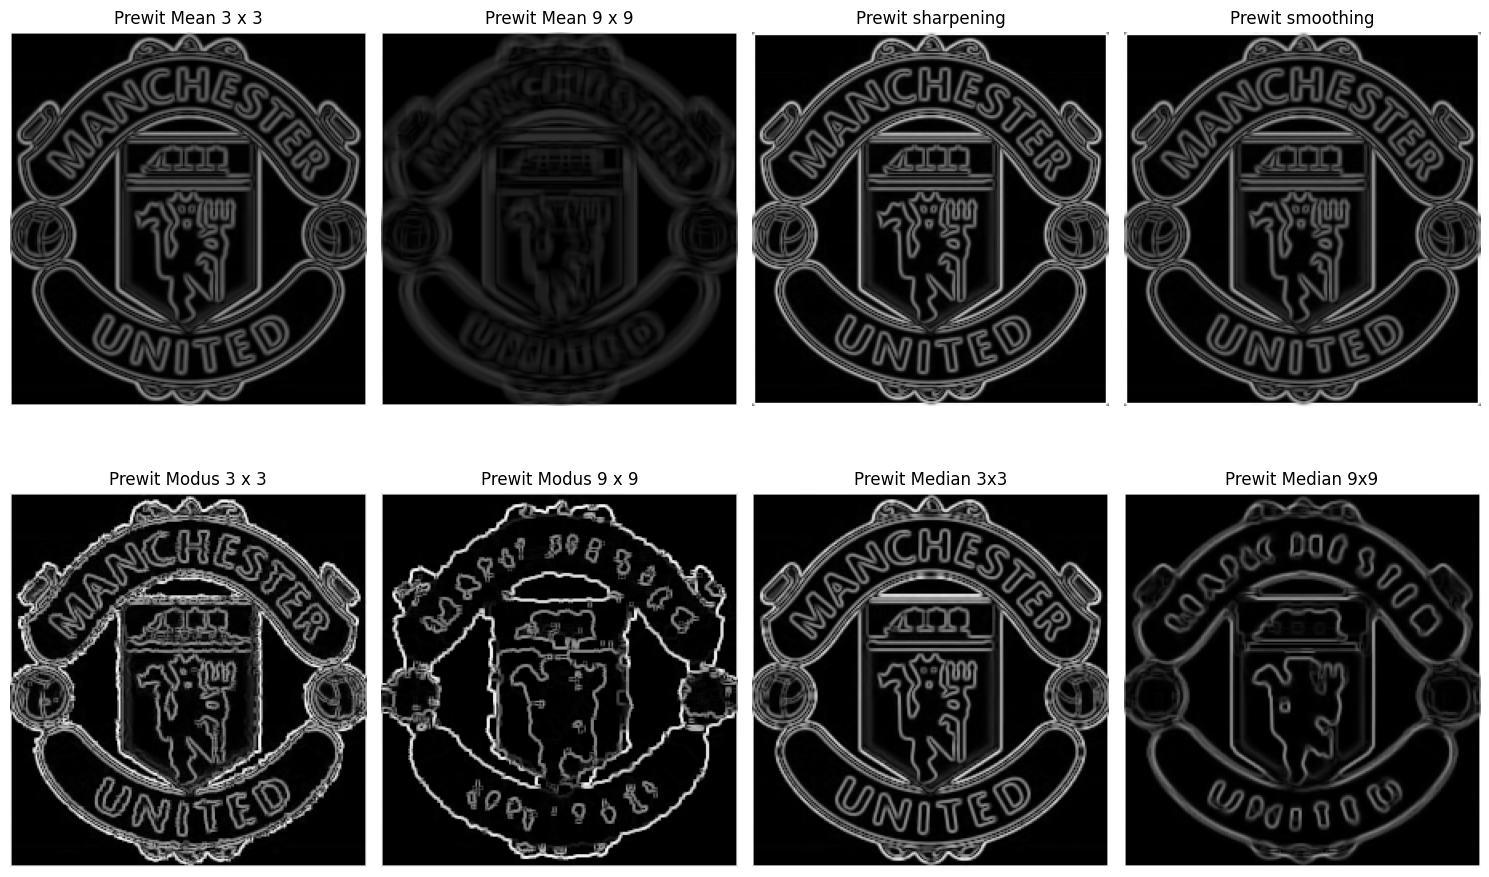

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0, 0].set_title('Prewit Mean 3 x 3')
ax[0, 0].imshow(Mean, cmap='gray')
ax[0, 0].axis('off')

ax[0, 1].set_title('Prewit Mean 9 x 9')
ax[0, 1].imshow(Mean1, cmap='gray')
ax[0, 1].axis('off')

ax[0, 2].set_title('Prewit sharpening')
ax[0, 2].imshow(Sharp, cmap='gray')
ax[0, 2].axis('off')

ax[0, 3].set_title('Prewit smoothing')
ax[0, 3].imshow(Smooth, cmap='gray')
ax[0, 3].axis('off')

ax[1, 0].set_title('Prewit Modus 3 x 3')
ax[1, 0].imshow(Modus, cmap='gray')
ax[1, 0].axis('off')

ax[1, 1].set_title('Prewit Modus 9 x 9')
ax[1, 1].imshow(Modus1, cmap='gray')
ax[1, 1].axis('off')

ax[1, 2].set_title('Prewit Median 3x3')
ax[1, 2].imshow(Median, cmap='gray')
ax[1, 2].axis('off')

ax[1, 3].set_title('Prewit Median 9x9')
ax[1, 3].imshow(Median1, cmap='gray')
ax[1, 3].axis('off')

plt.tight_layout()
plt.show()

In [19]:
Mean = deteksi_tepi(mean_3x3, sx, sy)
Mean1 = deteksi_tepi(mean_9x9, sx, sy)

Median = deteksi_tepi(median_3x3, sx, sy)
Median1 = deteksi_tepi(median_9x9, sx, sy)

Modus = deteksi_tepi(modus_3x3, sx, sy)
Modus1 = deteksi_tepi(modus_9x9, sx, sy)

Sharp = deteksi_tepi(sharpened_image, sx, sy)
Smooth = deteksi_tepi(smothgmbr, sx, sy)

Kode di atas mengaplikasikan deteksi tepi menggunakan kernel Sobel pada hasil operasi pemrosesan gambar yang telah dilakukan sebelumnya. Operasi deteksi tepi dilakukan pada citra hasil dari operasi mean, median, modus, sharpening, dan smoothing. Kernel Sobel yang telah didefinisikan sebelumnya (sx untuk deteksi tepi horizontal dan sy untuk deteksi tepi vertikal) digunakan untuk mendeteksi tepi dalam kedua arah tersebut

Kode di bawah menampilkan gambar hasil deteksi tepi menggunakan kernel Sobel pada berbagai operasi pemrosesan gambar sebelumnya. Hasil deteksi tepi dengan kernel Sobel diterapkan pada citra hasil operasi mean, median, modus, sharpening, dan smoothing dengan ukuran kernel 3x3 dan 9x9

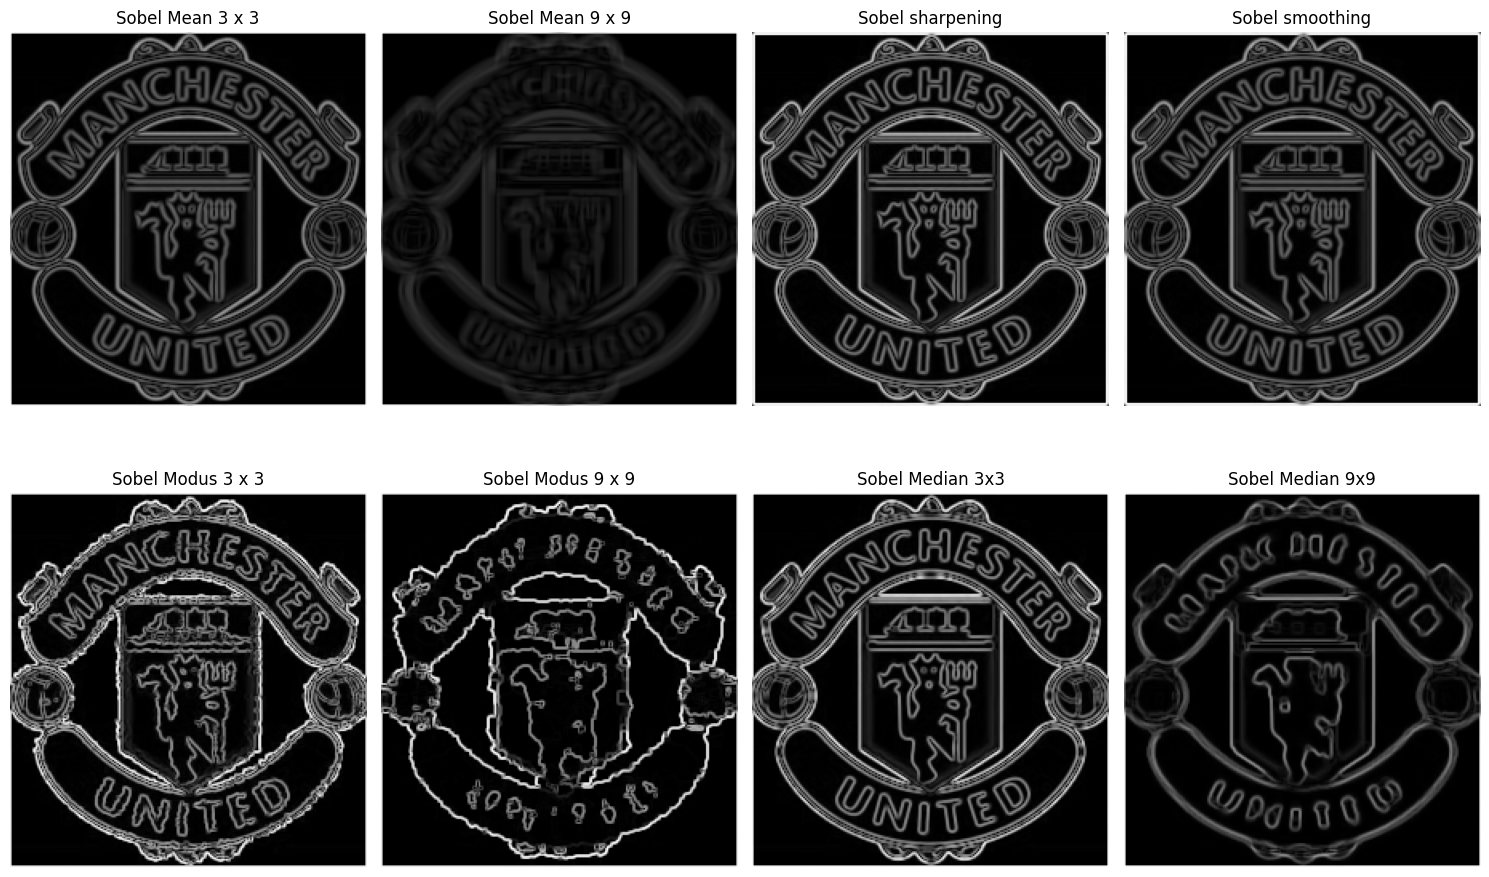

In [20]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0, 0].set_title('Sobel Mean 3 x 3')
ax[0, 0].imshow(Mean, cmap='gray')
ax[0, 0].axis('off')

ax[0, 1].set_title('Sobel Mean 9 x 9')
ax[0, 1].imshow(Mean1, cmap='gray')
ax[0, 1].axis('off')

ax[0, 2].set_title('Sobel sharpening')
ax[0, 2].imshow(Sharp, cmap='gray')
ax[0, 2].axis('off')

ax[0, 3].set_title('Sobel smoothing')
ax[0, 3].imshow(Smooth, cmap='gray')
ax[0, 3].axis('off')

ax[1, 0].set_title('Sobel Modus 3 x 3')
ax[1, 0].imshow(Modus, cmap='gray')
ax[1, 0].axis('off')

ax[1, 1].set_title('Sobel Modus 9 x 9')
ax[1, 1].imshow(Modus1, cmap='gray')
ax[1, 1].axis('off')

ax[1, 2].set_title('Sobel Median 3x3')
ax[1, 2].imshow(Median, cmap='gray')
ax[1, 2].axis('off')

ax[1, 3].set_title('Sobel Median 9x9')
ax[1, 3].imshow(Median1, cmap='gray')
ax[1, 3].axis('off')

plt.tight_layout()
plt.show()


In [21]:
Mean = deteksi_tepi(mean_3x3, robertX, robertY)
Mean1 = deteksi_tepi(mean_9x9, robertX, robertY)

Median = deteksi_tepi(median_3x3, robertX, robertY)
Median1 = deteksi_tepi(median_9x9, robertX, robertY)

Modus = deteksi_tepi(modus_3x3, robertX, robertY)
Modus1 = deteksi_tepi(modus_9x9, robertX, robertY)

Sharp = deteksi_tepi(sharpened_image, robertX, robertY)
Smooth = deteksi_tepi(smothgmbr, robertX, robertY)

Kode di atas mengaplikasikan deteksi tepi menggunakan kernel Robert pada hasil operasi pemrosesan gambar yang telah dilakukan sebelumnya. Operasi deteksi tepi dilakukan pada citra hasil dari operasi mean, median, modus, sharpening, dan smoothing. Kernel Robert yang telah didefinisikan sebelumnya robertX untuk deteksi tepi horizontal dan robertY untuk deteksi tepi vertikal digunakan untuk mendeteksi tepi dalam kedua arah tersebut

Kode di bawah menampilkan gambar hasil deteksi tepi menggunakan kernel Roberts pada berbagai operasi pemrosesan gambar sebelumnya. Hasil deteksi tepi dengan kernel Roberts diterapkan pada citra hasil operasi mean, median, modus, sharpening, dan smoothing dengan ukuran kernel 3x3 dan 9x9

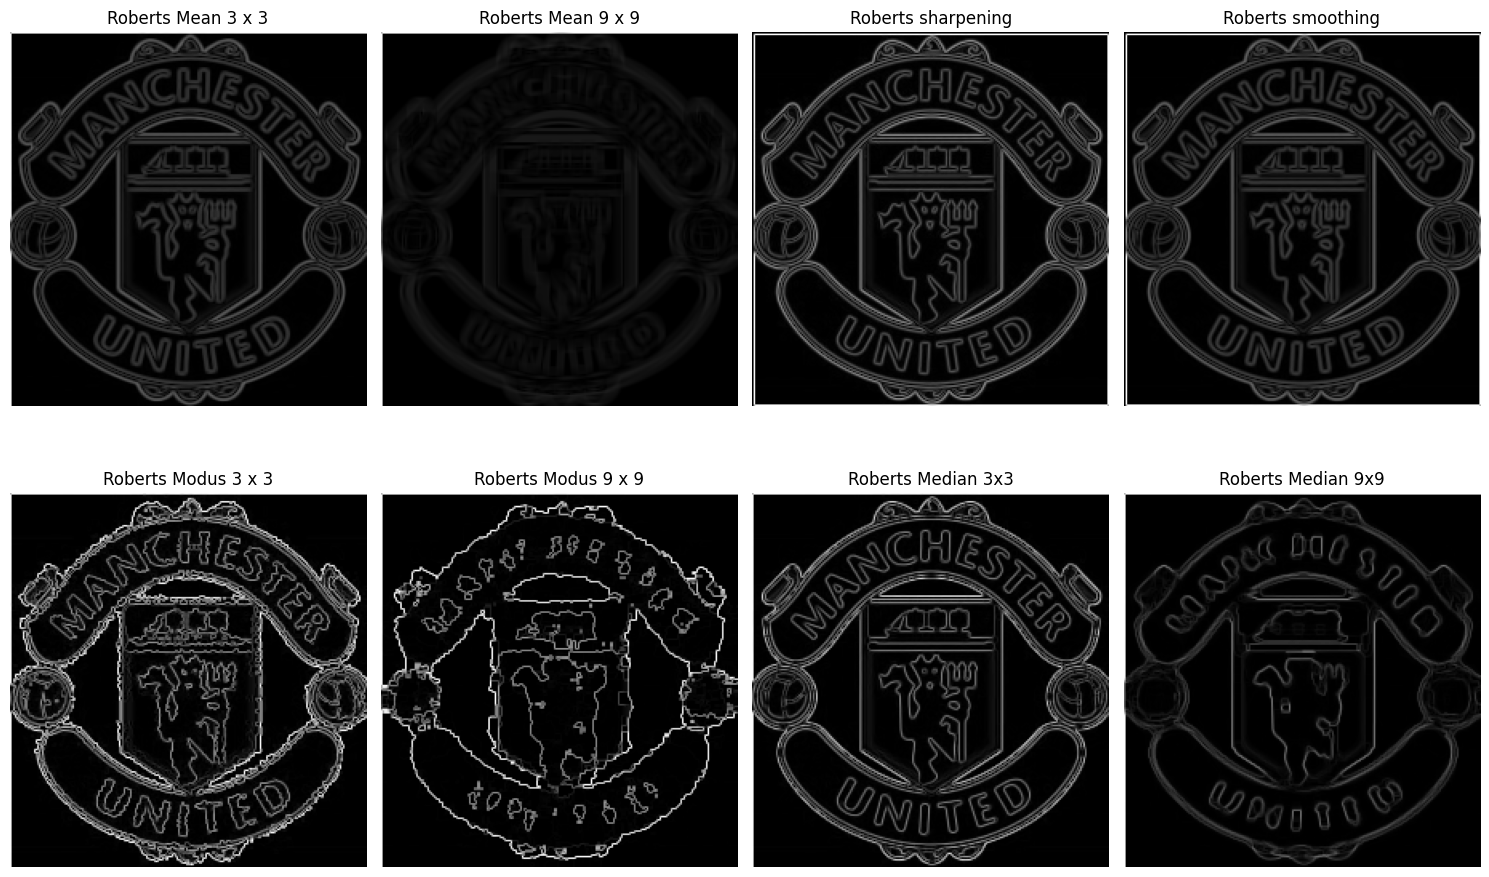

In [22]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

ax[0, 0].set_title('Roberts Mean 3 x 3')
ax[0, 0].imshow(Mean, cmap='gray')
ax[0, 0].axis('off')

ax[0, 1].set_title('Roberts Mean 9 x 9')
ax[0, 1].imshow(Mean1, cmap='gray')
ax[0, 1].axis('off')

ax[0, 2].set_title('Roberts sharpening')
ax[0, 2].imshow(Sharp, cmap='gray')
ax[0, 2].axis('off')

ax[0, 3].set_title('Roberts smoothing')
ax[0, 3].imshow(Smooth, cmap='gray')
ax[0, 3].axis('off')

ax[1, 0].set_title('Roberts Modus 3 x 3')
ax[1, 0].imshow(Modus, cmap='gray')
ax[1, 0].axis('off')

ax[1, 1].set_title('Roberts Modus 9 x 9')
ax[1, 1].imshow(Modus1, cmap='gray')
ax[1, 1].axis('off')

ax[1, 2].set_title('Roberts Median 3x3')
ax[1, 2].imshow(Median, cmap='gray')
ax[1, 2].axis('off')

ax[1, 3].set_title('Roberts Median 9x9')
ax[1, 3].imshow(Median1, cmap='gray')
ax[1, 3].axis('off')

plt.tight_layout()
plt.show()
